In [ ]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=feature_importances_#sklearn.ensemble.RandomForestClassifier.feature_importances_

# Feature Importanca com Random Forest

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [19]:
sample_behavior = pd.read_csv("../bases/AmostraBehavior.csv")
sample_behavior

,Id,Perf_final,UltPercLimit,Idade,N_Atraso30_59Dias,RazaoGastos,RendaMensal,N_EmeprestimosAbertos,N_atrasos_Ult90Dias,N_emprestimos,...,CAT_lnRazaoGastos,WOE_N_atrasos_Ult90Dias,WOE_N_emprestimos,WOE_N_Atraso60_89Dias,WOE_N_dependentes,WOE_CAT_UltPercLimit,WOE_CAT_Idade,WOE_CAT_RazaoGastos,WOE_CAT_lnRazaoGastos,WOE_CAT_N_EmeprestimosAbertos
0,18744,1,1.007054,50,3,0.141472,3300.0,4,0,5,...,2,0.396398,-0.249568,-2.741548,-0.296127,-1.251949,-0.039102,0.198561,0.198561,-0.360182
1,106506,0,0.014666,56,0,0.293676,5454.0,5,0,2,...,3,0.396398,0.199208,0.290109,-0.193107,1.270830,-0.039102,0.081338,0.081338,0.159293
2,133947,0,0.597323,42,0,0.138962,25000.0,11,0,2,...,2,0.396398,0.199208,0.290109,-0.296127,-0.034538,-0.254073,0.198561,0.198561,0.129020
3,81867,0,0.025595,50,0,0.342331,8520.0,12,0,2,...,3,0.396398,0.199208,0.290109,0.147208,1.478014,-0.039102,0.081338,0.081338,0.129020
4,108256,0,0.105306,80,0,0.143105,5764.0,14,0,5,...,2,0.396398,-0.249568,0.290109,-0.091080,0.875943,1.020199,0.198561,0.198561,-0.000105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7346,1576,0,0.000054,41,0,0.108462,5577.0,7,0,5,...,1,0.396398,-0.249568,0.290109,-0.091080,1.270830,-0.254073,0.062296,0.062296,0.159293
7347,28740,0,0.102461,66,0,0.686345,4166.0,18,0,2,...,4,0.396398,0.199208,0.290109,-0.193107,0.875943,1.020199,-0.423260,-0.423260,-0.000105
7348,147913,1,0.835482,46,1,0.291097,4166.0,6,0,5,...,3,0.396398,-0.249568,-1.859418,-0.193107,-1.251949,-0.254073,0.081338,0.081338,0.159293
7349,110681,1,0.006804,79,2,0.003998,2500.0,12,0,5,...,1,0.396398,-0.249568,-1.859418,0.147208,1.270830,1.020199,0.062296,0.062296,0.129020


In [21]:
labels = sample_behavior.columns[2:len(sample_behavior.columns)]
 
X = sample_behavior[labels] # Covariáveis
y = sample_behavior.Perf_final # Target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 999)

In [23]:
X_train.shape

(5145, 27)

In [24]:
X_test.shape

(2206, 27)

In [25]:
sample_behavior.shape

(7351, 29)

## Aplicando o Random Forest

In [26]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [27]:
# Verificando a importância de cada Feature
importances = forest.feature_importances_
importances

array([0.09572653, 0.06552718, 0.06370256, 0.0775513 , 0.08739363,
       0.052929  , 0.02938603, 0.01712159, 0.03091458, 0.02295457,
       0.07850012, 0.07797002, 0.02186518, 0.02111651, 0.00905886,
       0.02891819, 0.02060714, 0.00967716, 0.0424625 , 0.01784793,
       0.02399299, 0.02502947, 0.02177387, 0.01913424, 0.00912935,
       0.00875808, 0.02095141])

In [30]:
#pd.DataFrame({"variaveis":X_train.columns,"importancia":forest.feature_importances_}).sort_values('importancia',ascending=False)

In [31]:
# As importâncias são relativas pelo total, logo somam 1
sum(importances)

1.0

property feature_importances_
The impurity-based feature importances.

The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

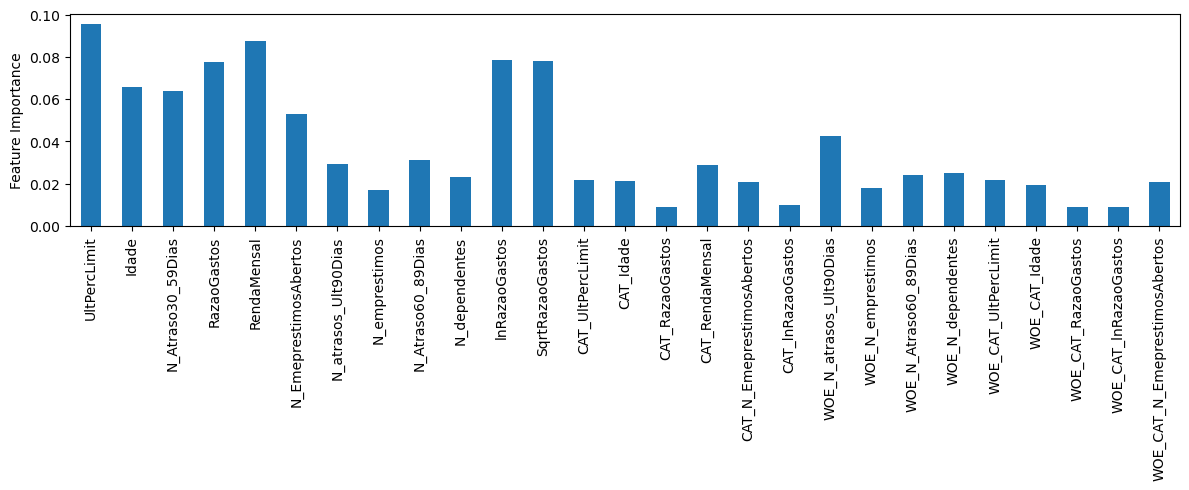

In [32]:
forest_importances = pd.Series(importances, index = X_train.columns)

fig, ax = plt.subplots(figsize = (12,5))
forest_importances.plot.bar(ax = ax)
ax.set_ylabel("Feature Importance")
fig.tight_layout()

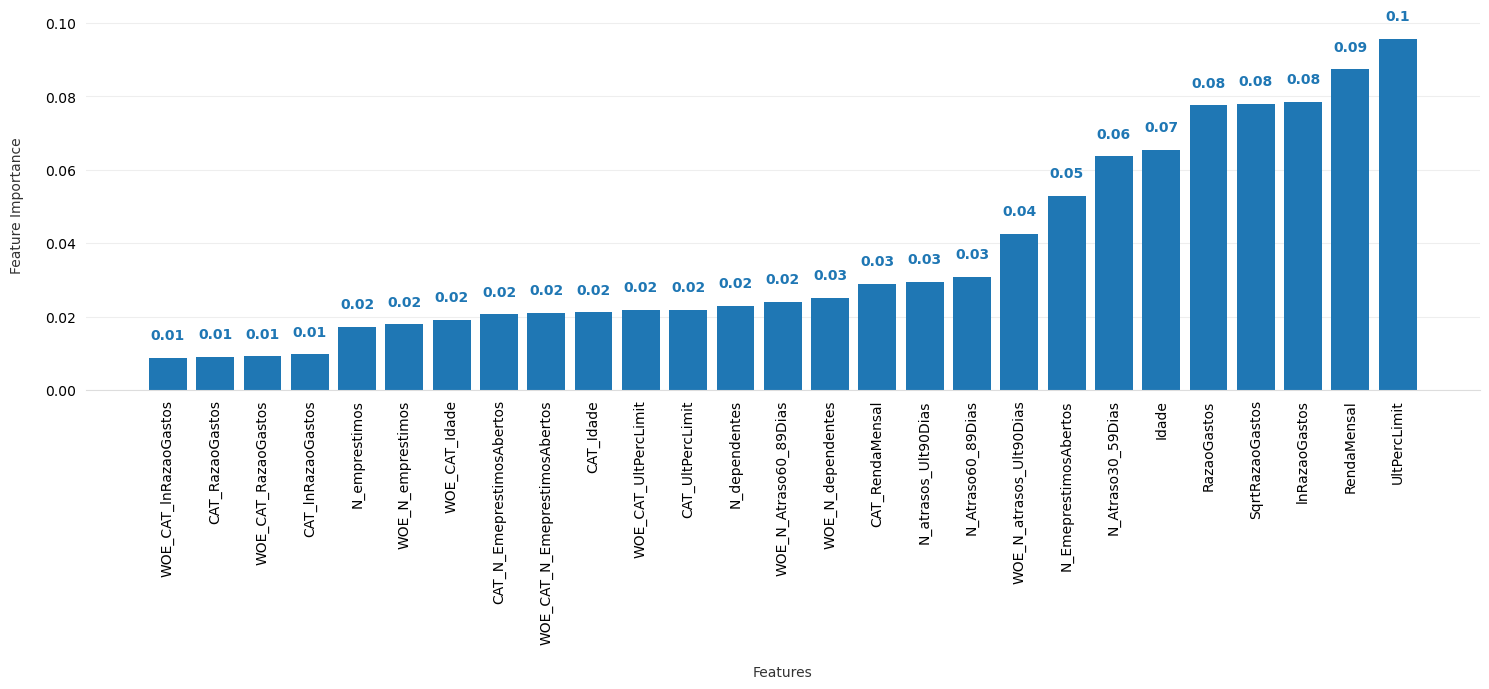

In [33]:
sorted_idx = forest.feature_importances_.argsort()

fig, ax = plt.subplots(figsize = (15,7))
bars = ax.bar(X_train.columns[sorted_idx], forest.feature_importances_[sorted_idx])

# Axis formatting.
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color = "#EEEEEE")
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.005,
      round(bar.get_height(), 2),
      horizontalalignment = "center",
      color = bar_color,
      weight = "bold"
  )

ax.set_xlabel("Features", labelpad=15, color='#333333')
ax.set_ylabel("Feature Importance", labelpad=15, color='#333333')
plt.xticks(rotation = 90)
fig.tight_layout()